Performing Exploratory Data Analysis and Feature Engineering to answer important business questions related to Coffee Shop Sales dataset. The table used is Transactions. I aim to answer the following business questions:
1. What are the overall sales trends?
2. Which store locations are performing the best?
3. Which product categories and types are the most popular?


In [37]:
import pandas as pd

# Load the dataset
xls = '/content/Coffee Shop Sales.xlsx'  # Store the file path as a string
df1 = pd.read_excel(xls)  # Read the entire Excel file

# The Excel file has multiple sheets
# I want to access the 'Transactions' sheet
df = pd.read_excel(xls, 'Transactions')

# The first 5 rows of the 'transactions' sheet
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7


In [38]:
# The last 5 rows of the dataset (to get an idea of the values)
df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,6,Jun,5,Fri,20
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,6,Jun,5,Fri,20
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,6,Jun,5,Fri,20
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,6,Jun,5,Fri,20
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup,1.60,6,Jun,5,Fri,20


Looking at this I'm thinking:
1. How many store locations are there?
2. How many unique product types?
3. Is product_detail necessary for my current analysis (probably not)?

What I understand from the last columns:
1. Month is numerical for Month.1
2. Weekday is numerical for weekday.1
3. Hour is related to transaction_time - the first digit of transaction_time


In [39]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  int64         
 13  Month.1           149116 non-null  object        
 14  Week

1. I would like transaction_date to be in date format (not datetime64).
2. Non-null count is the same for all columns which indicates that there are no missing values. Otherwise I would use
df.isnull().sum() to check for missing values and then handle them.

In [40]:
# transaction_date to date format
df['transaction_date'] = pd.to_datetime(df['transaction_date']).dt.date

# Updated info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
 11  Revenue           149116 non-null  float64
 12  Month             149116 non-null  int64  
 13  Month.1           149116 non-null  object 
 14  Weekday           149116 non-null  int64  
 15  Weekday.1         149116 non-null  object 
 16  Hour              14

In [41]:
# Display summary statistics of numerical columns
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price,Revenue,Month,Weekday,Hour
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219,4.686367,3.988881,3.982336,11.735790
std,43153.600016,0.542509,2.074241,17.930020,2.658723,4.227099,1.673091,1.996650,3.764662
min,1.000000,1.000000,3.000000,1.000000,0.800000,0.800000,1.000000,1.000000,6.000000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000,3.000000,3.000000,2.000000,9.000000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000,3.750000,4.000000,4.000000,11.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000,6.000000,5.000000,6.000000,15.000000
max,149456.000000,8.000000,8.000000,87.000000,45.000000,360.000000,6.000000,7.000000,20.000000


In [42]:
# Display summary statistics of categorical columns
df.describe(include=['O'])

,transaction_date,transaction_time,store_location,product_category,product_type,product_detail,Month.1,Weekday.1
count,149116,149116,149116,149116,149116,149116,149116,149116
unique,181,25762,3,9,29,80,6,7
top,2023-06-19,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant,Jun,Fri
freq,1343,41,50735,58416,17183,3076,35352,21701


As per my observation, the raw dataset is now clean useful dataset. Let's try visualizing to confirm this.

# 1. What are the overall sales trends?

**Trend of revenue/sales for the first 6 months**

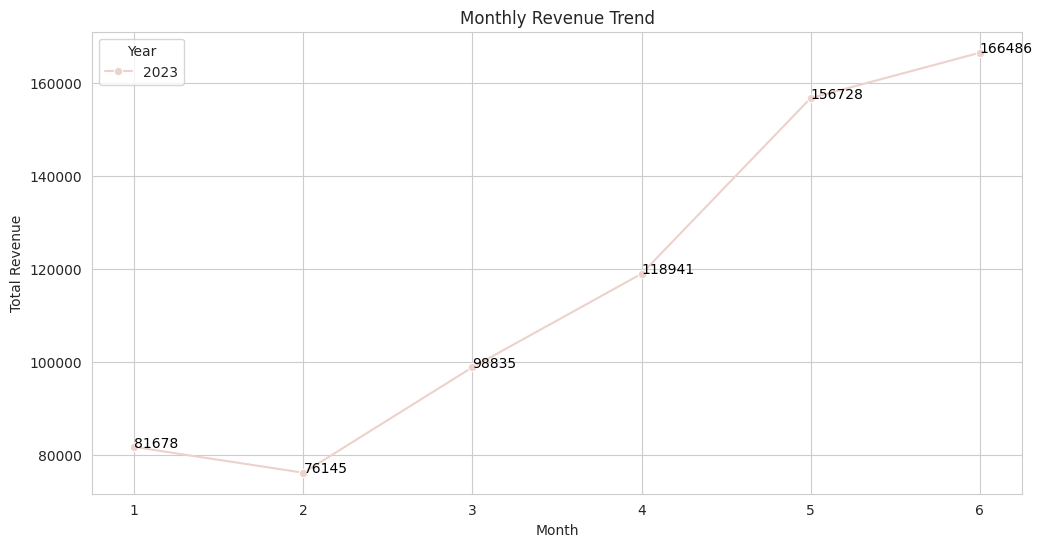

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# convert 'transaction_date' to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# get month and year from 'transaction_date'
df['month'] = df['transaction_date'].dt.month
df['year'] = df['transaction_date'].dt.year

# group by month and year and calculate total revenue
monthly_revenue = df.groupby(['year', 'month'])['Revenue'].sum().reset_index()

sns.set_style("whitegrid")

# line plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.lineplot(x='month', y='Revenue', hue='year', data=monthly_revenue, marker='o')

# labels and title
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')

# legend position
plt.legend(title='Year', loc='upper left')

# add numbers to the graph
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{y:.0f}', color='black')

# Display the plot
plt.show()

The overall trend in revenue is upward, showing consistent growth from January to June. Possible reasons could be less days in February as compared to other months or weather conditions. It is also a post-holiday month so people might want to cut back on expenses.

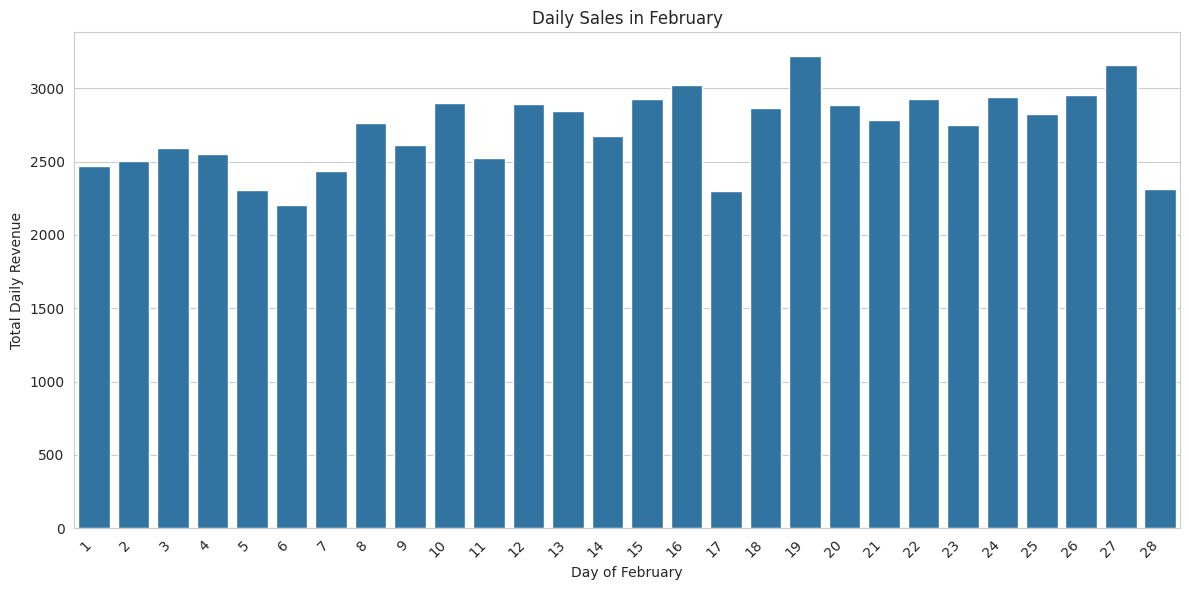

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Filter data for February
february_data = df[df['transaction_date'].dt.month == 2]

# Group by day and calculate total daily revenue
daily_revenue_february = february_data.groupby(february_data['transaction_date'].dt.day)['Revenue'].sum().reset_index()

sns.set_style("whitegrid")

# bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(x='transaction_date', y='Revenue', data=daily_revenue_february)

# labels and title
plt.xlabel('Day of February')
plt.ylabel('Total Daily Revenue')
plt.title('Daily Sales in February')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

I wanted to compare daily sales data within February to identify any specific days or periods with significant drops.

1. The revenue is fairly consistent throughout the month, with most days generating between 2,000 and 3,000 in revenue.

2. There are noticeable peaks on days 10, 16, 20, and 28, where the revenue exceeds 3,000.

3. There are dips below the typical range on days 6, 7, 18, and 28, indicating lower than average sales on these days.

# 2. Which store locations are performing the best?

**Number of Transactions per store location**

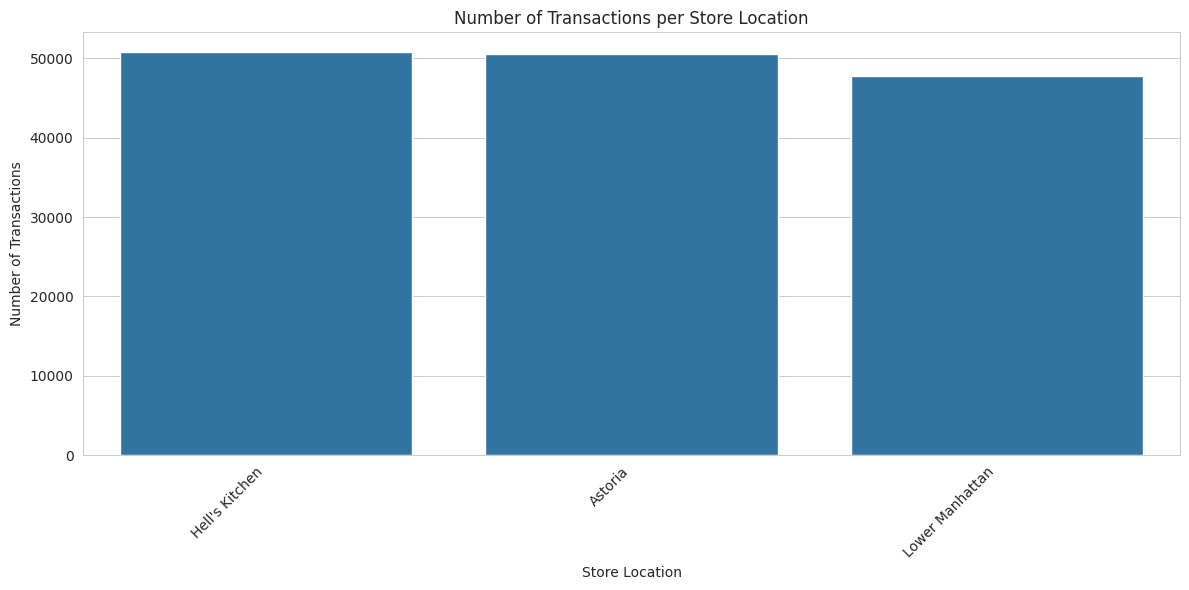

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count transactions per store location
transactions_by_location = df['store_location'].value_counts()


sns.set_style("whitegrid")

# bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=transactions_by_location.index, y=transactions_by_location.values)

# labels and title
plt.xlabel('Store Location')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Store Location')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

1. Hell's Kitchen and Astoria have nearly the same number of transactions, each with slightly over 50,000 transactions.
Lower Manhattan has a slightly lower number of transactions compared to the other two locations, but still close to 50,000.
2. The three locations have a relatively even distribution of transactions, indicating that no single location dominates in terms of transaction volume.
The slight difference in transaction counts suggests that customer traffic and sales might be consistent across these locations.

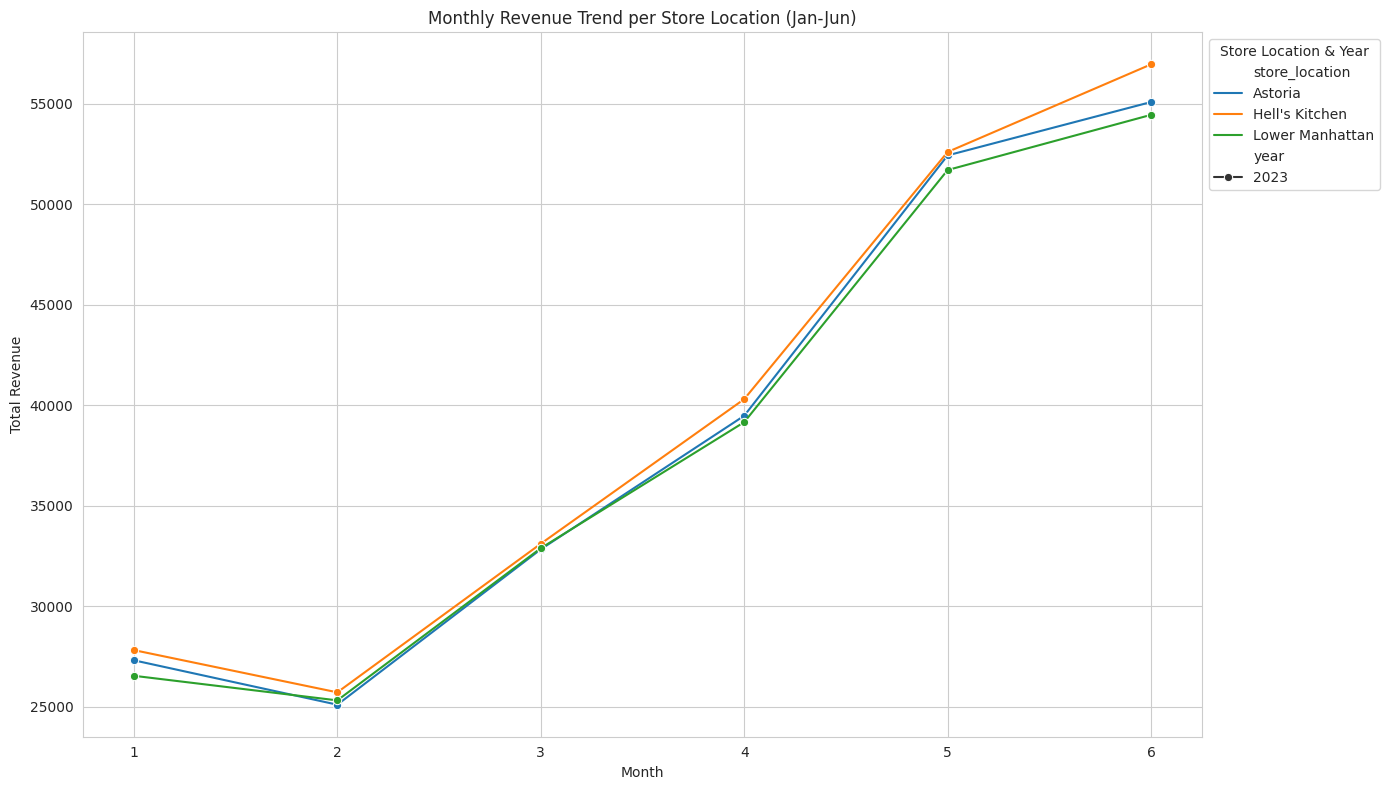

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Filter data for January to June
df_filtered = df[(df['transaction_date'].dt.month >= 1) & (df['transaction_date'].dt.month <= 6)]

# Extract month and year from 'transaction_date'
df_filtered['month'] = df_filtered['transaction_date'].dt.month
df_filtered['year'] = df_filtered['transaction_date'].dt.year

# Group by store location, year, and month, then calculate total revenue
monthly_revenue_by_store = df_filtered.groupby(['store_location', 'year', 'month'])['Revenue'].sum().reset_index()

sns.set_style("whitegrid")

# line plot
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
sns.lineplot(x='month', y='Revenue', hue='store_location', style='year', data=monthly_revenue_by_store, markers=True)

# labels and title
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend per Store Location (Jan-Jun)')

# legend position
plt.legend(title='Store Location & Year', loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot

# Display
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

I wanted to see which store was performing the best.This line plot shows the monthly revenue trend from January to June for three store locations: Astoria, Hell's Kitchen, and Lower Manhattan.

1. All three locations show a consistent upward trend in revenue from March to June, indicating overall business growth during this period.
2. There is a noticeable dip in revenue for all locations in February, which aligns with the previous observation of a dip in February.
3. **Hell's Kitchen** consistently shows higher revenue compared to Astoria and Lower Manhattan, especially from March onwards.

# 3. Which product categories and types are the most popular?

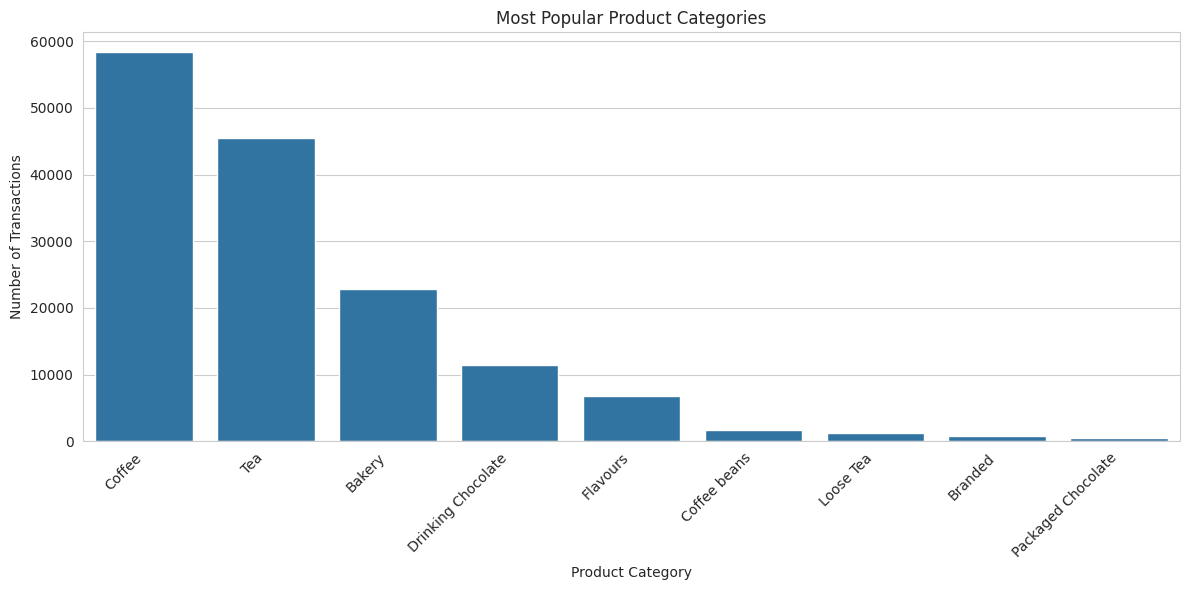

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# count occurrences of each product category
category_counts = df['product_category'].value_counts()

sns.set_style("whitegrid")

# bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=category_counts.index, y=category_counts.values)

# labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Most Popular Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

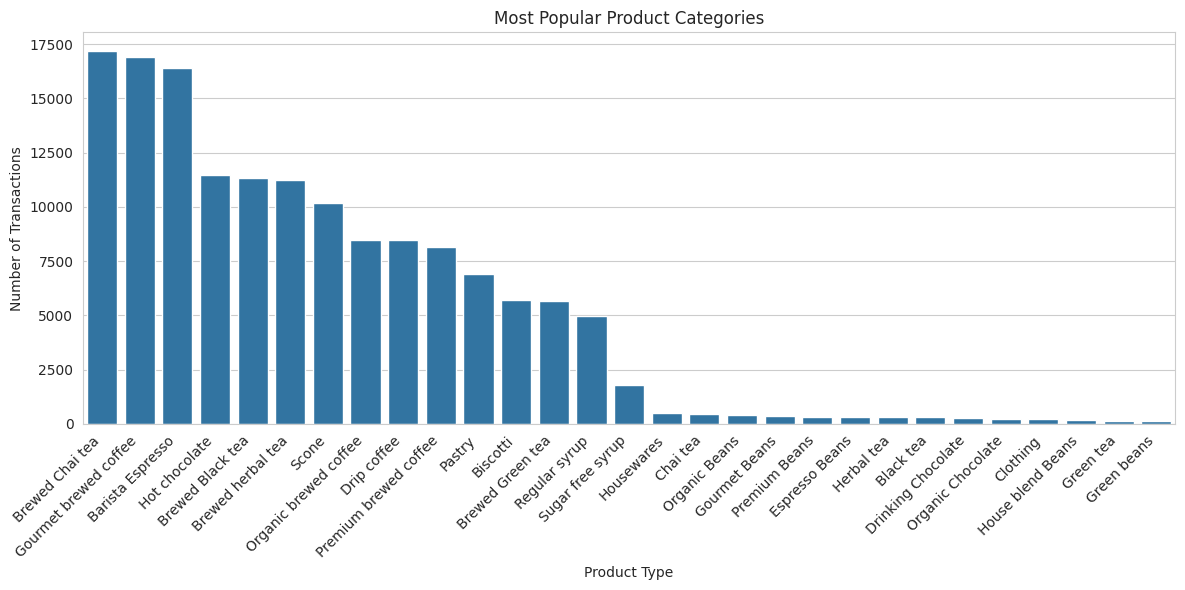

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# count occurrences of each product category
category_counts = df['product_type'].value_counts()

sns.set_style("whitegrid")

# bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=category_counts.index, y=category_counts.values)

# labels and title
plt.xlabel('Product Type')
plt.ylabel('Number of Transactions')
plt.title('Most Popular Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Categories: Coffee, tea, and bakery items are the top categories driving the majority of transactions.

Types: Within these categories, brewed chai tea, gourmet brewed coffee, barista espresso, and hot chocolate are the most popular product types.

As a coffee shop owner, I would prioritize stocking popular categories and types to meet customer demand.

I hope you enjoyed the EDA guided project. To get updates about my projects, please subscribe to my blog: https://zenwave.substack.com/

Follow and Connect with me on LinkedIn: https://www.linkedin.com/in/sonumpunshi/  